# K-MEAN CLUSTERING

In [22]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [24]:
df = pd.read_csv('../Datasets/RegData.csv')

In [26]:
df

,StID,SAT,GPA
0,101,1355,3.42
1,102,1391,3.48
2,103,1170,2.91
3,104,1357,3.41
4,105,1326,3.28
...,...,...,...
79,193,1365,3.37
80,195,1479,3.41
81,196,1324,3.40
82,197,1294,3.28


In [28]:
df.shape

(84, 3)

In [30]:
df.dtypes

StID      int64
SAT       int64
GPA     float64
dtype: object

In [32]:
data = df[['SAT', 'GPA']]
data

,SAT,GPA
0,1355,3.42
1,1391,3.48
2,1170,2.91
3,1357,3.41
4,1326,3.28
...,...,...
79,1365,3.37
80,1479,3.41
81,1324,3.40
82,1294,3.28


In [34]:
sil_scores = []
scre = 0; kn = 2; kmx = 9
for k in range(2, kmx):
    kmeans = KMeans(n_clusters=k, init= 'k-means++')
    labels = kmeans.fit_predict(data)
    sil_score = silhouette_score(data, labels)

    if scre < sil_score:
        scre = sil_score
        kn = k

    sil_scores.append(sil_score)
    print('silhouette Score:', sil_score)

print(kn, ':', scre)

silhouette Score: 0.5736735954425779
silhouette Score: 0.5613045052787246
silhouette Score: 0.5975882354194894
silhouette Score: 0.5137350654488038
silhouette Score: 0.479831022419397
silhouette Score: 0.5598752678749309
silhouette Score: 0.5659578728883139
4 : 0.5975882354194894


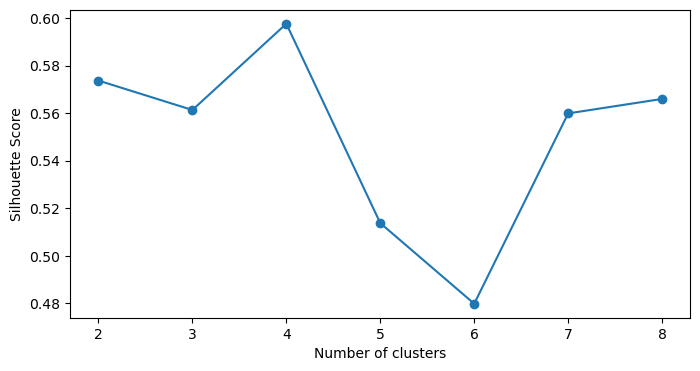

In [35]:
frame = pd.DataFrame({'Cluster': range(2, 9), 'Silhouette Score': sil_scores})
plt.figure(figsize=(8, 4))
plt.plot(frame['Cluster'], frame['Silhouette Score'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score');

In [38]:
kmns = KMeans(n_clusters=kn, init='k-means++', max_iter = 300, random_state=5)
y_kmeans = kmns.fit_predict(data)
print(y_kmeans)

kmns.cluster_centers_

[0 0 1 0 2 0 3 2 0 3 2 2 2 2 2 3 3 1 0 0 1 0 0 3 0 1 1 3 0 3 0 2 3 2 3 3 1
 2 0 3 0 0 2 3 2 0 3 1 3 1 2 0 2 0 1 2 1 3 1 1 2 0 2 0 0 3 2 3 2 2 0 2 2 2
 0 1 1 0 1 0 3 2 2 0]


array([[1384.84615385,    3.42884615],
       [1194.66666667,    3.042     ],
       [1290.12      ,    3.2652    ],
       [1490.22222222,    3.51833333]])

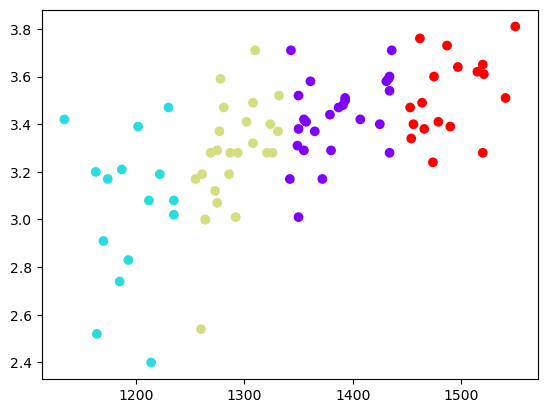

In [40]:
plt.scatter(df['SAT'], df['GPA'], c=y_kmeans, cmap='rainbow')